# Neural Networks Tutorial – A Pathway to Deep Learning

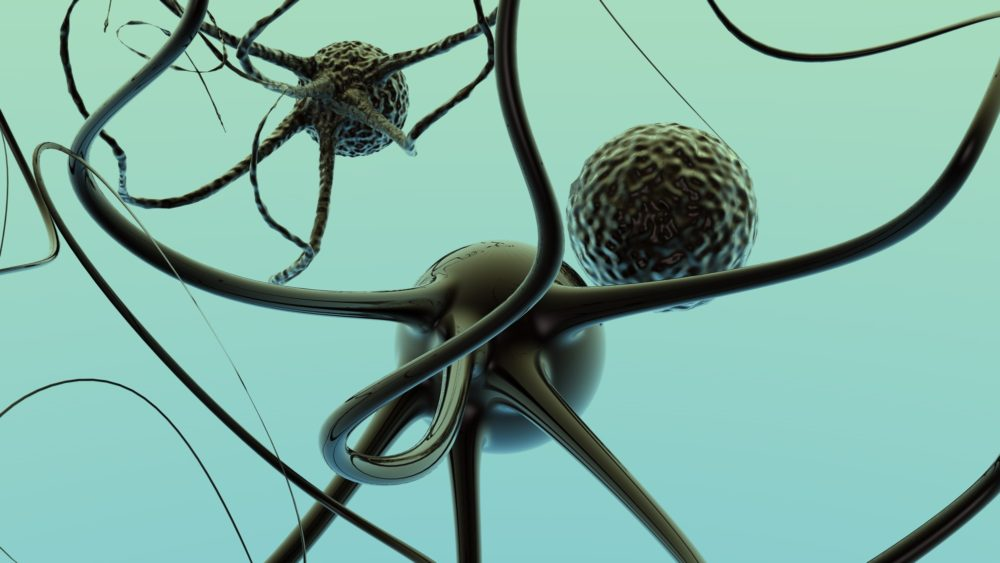

**https://adventuresinmachinelearning.com/neural-networks-tutorial/**

## The Structure of an ANN

### The artificial neuron

f(z) = 1/(1+exp(-z) - sigmoid activation function

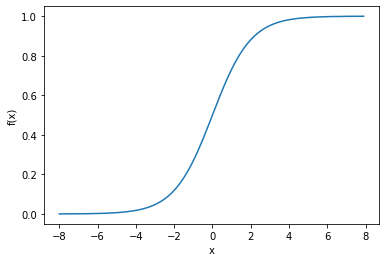

In [2]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
x = np.arange(-8,8,0.1)
f = 1/(1+np.exp(-x))

plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### The notation
w
i
j
(
l
)
. 
i
 refers to the node number of the connection in layer 
l
+
1
 and 
j
 refers to the node number of the connection in layer 
l
. Take special note of this order. So, for the connection between node 1 in layer 1 and node 2 in layer 2, the weight notation would be 
w
21
(
1
)
. This notation may seem a bit odd, as you would expect the *i* and *j* to refer the node numbers in layers 
l
 and 
l
+
1
 respectively (i.e. in the direction of input to output), rather than the opposite. However, this notation makes more sense when you add the bias.

![Three layer neural network](https://i0.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2017/03/Three-layer-network.png?w=591&ssl=1)

## The feed-forward pass

\begin{align} 
h_1^{(2)} &= f(w_{11}^{(1)}x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)}) \\ 
h_2^{(2)} &= f(w_{21}^{(1)}x_1 + w_{22}^{(1)} x_2 + w_{23}^{(1)} x_3 + b_2^{(1)}) \\ 
h_3^{(2)} &= f(w_{31}^{(1)}x_1 + w_{32}^{(1)} x_2 + w_{33}^{(1)} x_3 + b_3^{(1)}) \\ 
h_{W,b}(x) &= h_1^{(3)} = f(w_{11}^{(2)}h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)}) 
\end{align}

\begin{equation} 
W^{(1)} = 
\begin{pmatrix} 
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\ 
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \\ 
w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)} \\ 
\end{pmatrix} 
\end{equation}

\begin{equation} 
W^{(2)} = 
\begin{pmatrix} 
w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)} 
\end{pmatrix} 
\end{equation}

In [7]:
import numpy as np

w1 = np.array([[0.2,0.2,0.2], [0.4,0.4,0.4], [0.6,0.6,0.6]])
w2 = np.zeros((1,3))
w2[0,:] = np.array([0.5,0.5,0.5])
b1= np.array([0.8,0.8,0.8])
b2 = np.array([0.2])

In [8]:
def f(x):
    return 1 / (1 + np.exp(-x))

### Vectorization of neural networks


\begin{align} z_{1}^{(2)} = w_{11}^{(1)}x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)} = \sum_{j=1}^{n} w_{ij}^{(1)}x_i + b_{i}^{(1)}\end{align}

\begin{align} 
z^{(2)} &= W^{(1)} x + b^{(1)} \\ 
h^{(2)} &= f(z^{(2)}) \\ 
z^{(3)} &= W^{(2)} h^{(2)} + b^{(2)} \\ 
h_{W,b}(x) &= h^{(3)} = f(z^{(3)}) 
\end{align}

In [9]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

## Gradient descent and optimization

![Simple, one-dimensional gradient descent](https://i1.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2017/03/Gradient-descent.jpg?w=553&ssl=1)

### A simple example in code
Below is an example of a simple Python implementation of gradient descent for solving the minimum of the equation \begin{align}f(x) = x^4 – 3x^3 + 2\end{align} The gradient of this function is able to be calculated analytically (i.e. we can do it easily using calculus, which we can’t do with many real world applications) and is \begin{align} f'(x) = 4x^3 – 9x^2 \end{align}

In [10]:
x_old = 0 # The value does not matter as long as abs(n_new - x_old) > precision
x_new = 6 # The algorithm start as x = 6
gamma = 0.01 #step size
precision = 0.0001

def df(x):
    y = 4 * x**3 - 9* x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print('the local minimum occurs at %f'% x_new)

the local minimum occurs at 2.249660


## Implementing the neural network in python

(1797, 64)


<Figure size 432x288 with 0 Axes>

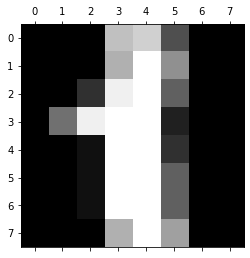

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

### Scaling data

In [12]:
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Notice that the input data ranges from 0 up to 15?  It’s standard practice to scale the input data so that it all fits mostly between either 0 to 1 or with a small range centred around 0 i.e. -1 to 1.  Why?  Well, it can help the convergence of the neural network and is especially important if we are combining different data types. 

In [13]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

### Creating test and training datasets

In [14]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.4)

For the MNIST data supplied in the scikit learn dataset, the “targets” or the classification of the handwritten digits is in the form of a single number. We need to convert that single number into a vector so that it lines up with our 10 node output layer. In other words, if the target value in the dataset is “1” we want to convert it into the vector: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]. The code below does just that:

In [17]:
import numpy as np
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y),10))
    for i in range(len(y)):
        y_vect[i,y[i]]=1
    return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(6, array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

### Creating the neural network
THe number of hidden layer nodes is somewhere between the number of input layers and the number of output layers

In [18]:
nn_structure = [64, 30, 10]

In [19]:
def f(x):
    return 1 / (1 + np.exp(-x))
def f_deriv(x):
    return f(x) * (1 - f(x))

In [20]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [21]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [23]:
def feed_forward(x,W,b):
    h = {1:x}
    z = {}
    for l in range(1,len(W) +1):
         # if it is the first layer, then the input into the weights is x, otherwise, 
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = x
        
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)  
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l)) 
    return h, z

In [25]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)